In [26]:
pip install matplotlib pandas numpy seaborn

Note: you may need to restart the kernel to use updated packages.


In [27]:
import os
import json
import pandas as pd
import numpy as np
import glob
import matplotlib as plt
import seaborn as sns

VERSIONS = [ "1.8.0_292", "11.0.11", "14.0.2", "16.0.1" ]

In [28]:
temp = pd.DataFrame()

DATA_PATH = "../data/"
json_pattern = os.path.join(DATA_PATH, '*.json')
file_list = glob.glob(json_pattern)

for file in file_list:
    f = open(file)
    data = json.load(f)
    f.close()
    frame = pd.json_normalize(data)
    temp = temp.append(frame, ignore_index = True)

#temp

In [29]:
results = pd.DataFrame()
for x in range(temp.data.shape[0]):
    row = pd.json_normalize(temp['data'][x])
    row['parent'] = x
    results = results.append(row, ignore_index = True)
results

avg        min                         test        max   sygmaPct  \
0   421018672  408780111    DirectByteBufferGenerator  436618947  31.326507   
1    96341583   91140344        DirectByteBufferInput  119066963  36.449722   
2   951902881  943385076        StreamsBasedGenerator  956642838  38.070106   
3   119437737  115398332            StreamsBasedInput  132375171  35.133154   
4   469253990  455254432  IndirectByteBufferGenerator  478659783  32.390127   
..        ...        ...                          ...        ...        ...   
95  117770871  113222656      IndirectByteBufferInput  133799088  35.272243   
96   22086045   19167613        MemoryMappedGenerator   24198076  30.739656   
97   77045045   72387869            MemoryMappedInput   88982221  34.189169   
98  475831588  466350435             ArtemisGenerator  490600669  33.275180   
99   58035393   50410012                 ArtemisInput   63383373  38.175119   

                                               timing       sygma  \
0   [421621054, 420952872, 408780111, 436618947, 4...   8720935.0   
1   [119066963, 92888409, 91224412, 91826660, 9114...  10179175.0   
2   [954690220, 943385076, 953558752, 956642838, 9...   5047244.0   
3   [132375171, 116679000, 116461363, 119891728, 1...   5964499.0   
4   [467801674, 466166061, 455254432, 475693868, 4...   7581023.0   
..                                                ...         ...   
95  [133799088, 116007142, 116099855, 114060685, 1...   7257769.0   
96  [24198076, 22834160, 21885754, 21608705, 22821...   1546347.0   
97  [72387869, 72605927, 74025396, 76906203, 77362...   5673471.0   
98  [466350435, 490600669, 475490245, 475519020, 4...   8069309.0   
99  [63383373, 55135483, 62442380, 50410012, 62438...   4952596.0   

    memory.proc  memory.total   memory.max  memory.free  config.queueSize  \
0            12    1011351552  14984151040    982524576               NaN   
1            12    1011351552  14984151040   1000061088               NaN   
2            12    1011351552  14984151040   1003597688               NaN   
3            12    1011351552  14984151040   1000064256               NaN   
4            12    1011351552  14984151040   1003520328               NaN   
..          ...           ...          ...          ...               ...   
95           12     889192448    889192448    853540864               NaN   
96           12     889192448    889192448    853540864               NaN   
97           12     889192448    889192448    853540864               NaN   
98           12     889192448    889192448    838860800              64.0   
99           12     889192448    889192448    828375040              64.0   

   config.direct config.semaphore config.fdataSync  parent  
0            NaN              NaN              NaN       0  
1            NaN              NaN              NaN       0  
2            NaN              NaN              NaN       0  
3            NaN              NaN              NaN       0  
4            NaN              NaN              NaN       0  
..           ...              ...              ...     ...  
95           NaN              NaN              NaN       9  
96           NaN              NaN              NaN       9  
97           NaN              NaN              NaN       9  
98          True             True             True       9  
99         False             True            False       9  

[100 rows x 16 columns]

In [30]:
joined = pd.merge(results[['avg', 'min', 'max', 'sygma', 'test', 'parent']], temp[['java.version']], left_on='parent', right_on=temp.index, how='left')
gb = joined.groupby(['test', 'java.version'])
gb

In [31]:
#joined = joined.set_index('test')
#axes = gb.plot.bar(x='java.version', y=['avg', 'min', 'max'], figsize=(20,10), subplots=False)
#axes[1].legend(loc=2)

In [32]:
inputs = joined[joined['test'].str.endswith("Input")].sort_values(['test', 'java.version'])
outputs = joined[joined['test'].str.endswith("Generator")].sort_values(['test', 'java.version'])
inputs

avg        min        max       sygma                     test  \
69   53102977   46375354   66515238   6847781.0             ArtemisInput   
9    54433160   50518035   58456935   2294961.0             ArtemisInput   
19   65353641   54404014   70432716   5554271.0             ArtemisInput   
89   65293241   46623669   79188296  12052392.0             ArtemisInput   
29   59001521   46978805   75366709   9670523.0             ArtemisInput   
59   56813011   50396567   66908816   6042463.0             ArtemisInput   
79   54032104   46650029   62342082   4803687.0             ArtemisInput   
99   58035393   50410012   63383373   4952596.0             ArtemisInput   
49   55959394   46539773   70369408   7109938.0             ArtemisInput   
39   57930429   46606708   66677032   6289108.0             ArtemisInput   
61   98922467   94903531  114392856   6974013.0    DirectByteBufferInput   
1    96341583   91140344  119066963  10179175.0    DirectByteBufferInput   
11   95889699   91593222  110062046   6558068.0    DirectByteBufferInput   
81   98492153   93203738  117316834   8488419.0    DirectByteBufferInput   
21  102227896   91056688  123428372  11501716.0    DirectByteBufferInput   
51   96674488   92585040  112253331   7010606.0    DirectByteBufferInput   
71   98245107   93975223  113631150   6914100.0    DirectByteBufferInput   
91   96332275   91066365  112241718   7236359.0    DirectByteBufferInput   
41   98654329   94470301  113952893   6908186.0    DirectByteBufferInput   
31   96671125   93052115  112292014   7012460.0    DirectByteBufferInput   
65  133079026  128760387  150079240   7623317.0  IndirectByteBufferInput   
5   132520999  127797506  151655034   8601284.0  IndirectByteBufferInput   
15  114346063  109561528  129457324   6955602.0  IndirectByteBufferInput   
85  119702441  114595015  139084205   8712127.0  IndirectByteBufferInput   
25  146808454  142251710  162961230   7268372.0  IndirectByteBufferInput   
55  114766705  109849078  133429125   8409403.0  IndirectByteBufferInput   
75  116334014  112572819  131110250   6632471.0  IndirectByteBufferInput   
95  117770871  113222656  133799088   7257769.0  IndirectByteBufferInput   
45  116659120  112151299  131712038   6820159.0  IndirectByteBufferInput   
35  117800543  113605193  132678249   6719240.0  IndirectByteBufferInput   
67   88675461   87691793   90256979    922829.0        MemoryMappedInput   
7    86942456   85850065   89835530   1366070.0        MemoryMappedInput   
17   73805020   67751354   79048505   3956407.0        MemoryMappedInput   
87   71315613   69633349   72684925    991546.0        MemoryMappedInput   
27   74962274   71443740   77827127   2571201.0        MemoryMappedInput   
57   69014235   68280927   70217925    699321.0        MemoryMappedInput   
77   71394077   70818950   72035599    449422.0        MemoryMappedInput   
97   77045045   72387869   88982221   5673471.0        MemoryMappedInput   
47   69886945   69029277   70580213    495250.0        MemoryMappedInput   
37   69367830   68452488   70242360    734197.0        MemoryMappedInput   
63  117174032  113453998  130698508   6090672.0        StreamsBasedInput   
3   119437737  115398332  132375171   5964499.0        StreamsBasedInput   
13  119464856  116114342  133148589   6136193.0        StreamsBasedInput   
83  118653221  113439150  132535059   6381471.0        StreamsBasedInput   
23  152802712  148107509  164721337   5614610.0        StreamsBasedInput   
53  114545125  110901268  130027243   6935201.0        StreamsBasedInput   
73  117743881  114354435  131313480   6110153.0        StreamsBasedInput   
93  123971870  118563180  138446864   7092154.0        StreamsBasedInput   
43  117408083  112465917  131756120   6542006.0        StreamsBasedInput   
33  115569706  111666632  130838253   6860178.0        StreamsBasedInput   

    parent java.version  
69       6    1.8.0_292  
9        0    1.8.0_302  
19       1    1.8.0_302  
89       8      11.0.11  
29 

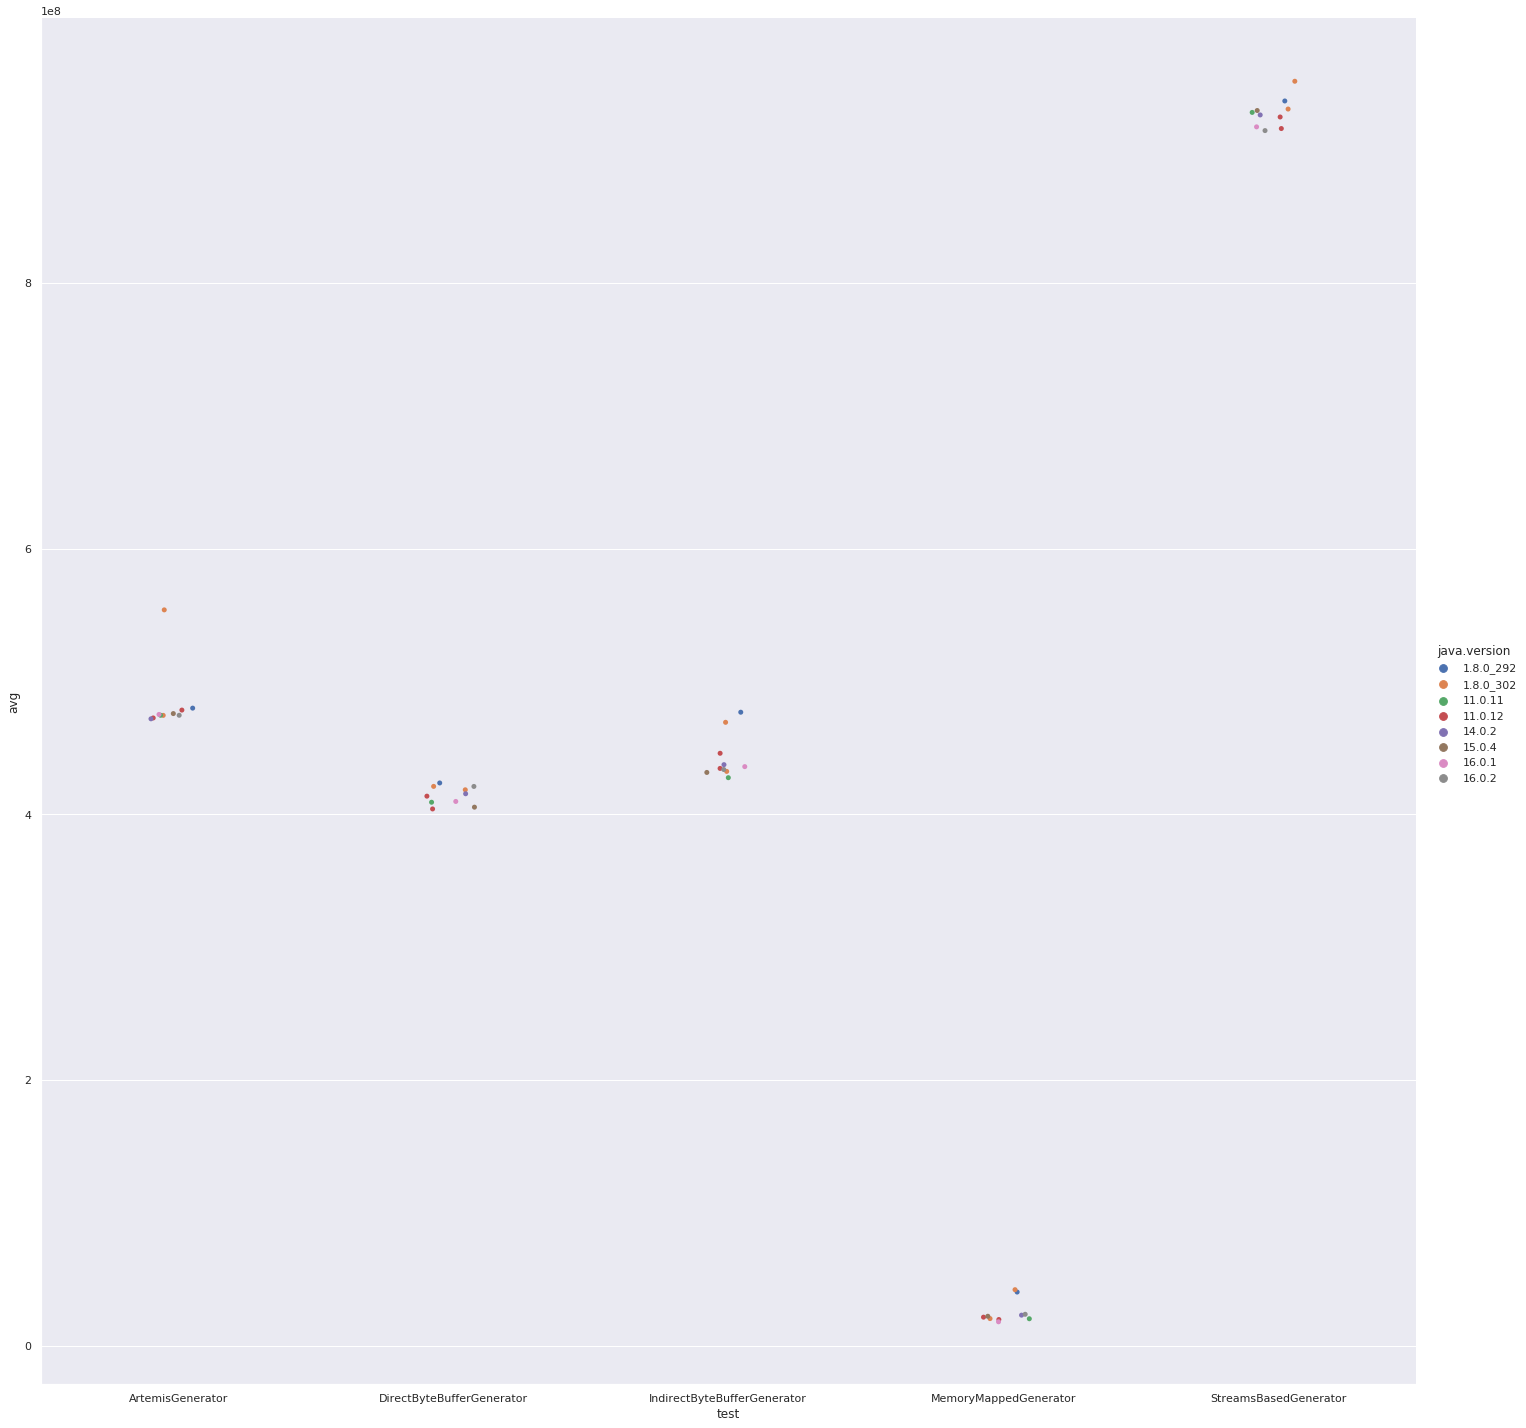

In [48]:
sns.set()
og = sns.catplot(
    data=outputs,
    x="test", y='avg', hue='java.version',
     height=20)
##g.set_axis_labels("", "Body mass (g)")
#g.legend.set_title("")

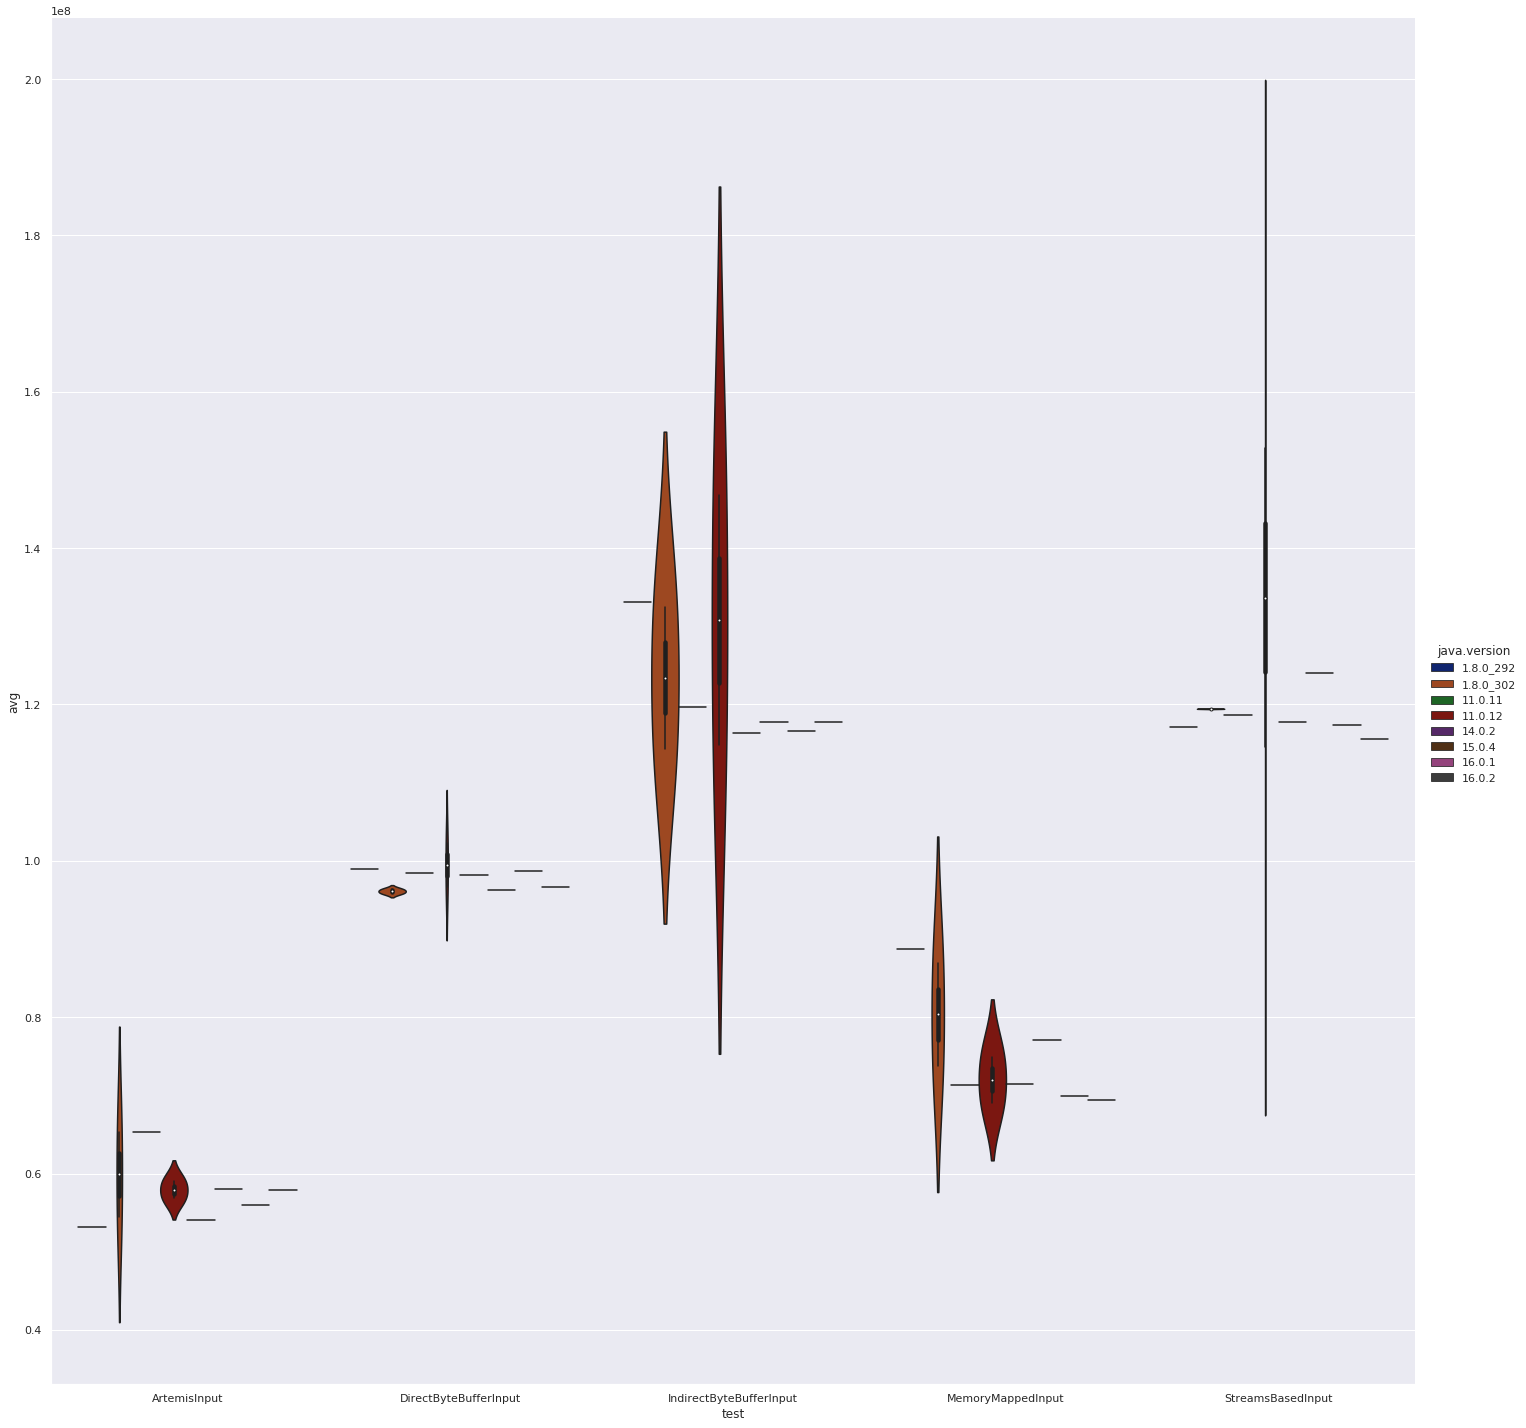

In [45]:
ig = sns.catplot(
    data=inputs, kind="violin",
    x="test", y='avg', hue='java.version',
     palette="dark", alpha=.6, height=20
)

In [35]:
ogroup = outputs.sort_index().groupby(['test', 'java.version']).avg.agg(['min', 'max'])
ogroup

min        max
test                        java.version                      
ArtemisGenerator            1.8.0_292     479929345  479929345
                            1.8.0_302     474475198  553905584
                            11.0.11       474560885  474560885
                            11.0.12       472527581  478469141
                            14.0.2        471887159  471887159
                            15.0.4        475831588  475831588
                            16.0.1        475174519  475174519
                            16.0.2        474554108  474554108
DirectByteBufferGenerator   1.8.0_292     423595991  423595991
                            1.8.0_302     418447313  421018672
                            11.0.11       409081098  409081098
                            11.0.12       404036336  413658354
                            14.0.2        415467067  415467067
                            15.0.4        405374707  405374707
                            16.0.1        409677524  409677524
                            16.0.2        420976937  420976937
IndirectByteBufferGenerator 1.8.0_292     476860779  476860779
                            1.8.0_302     432294936  469253990
                            11.0.11       427564304  427564304
                            11.0.12       434543350  445942212
                            14.0.2        437369514  437369514
                            15.0.4        431514361  431514361
                            16.0.1        435888807  435888807
                            16.0.2        433716949  433716949
MemoryMappedGenerator       1.8.0_292      40314721   40314721
                            1.8.0_302      20328795   42087807
                            11.0.11        20210915   20210915
                            11.0.12        19631556   21405031
                            14.0.2         22920358   22920358
                            15.0.4         22086045   22086045
                            16.0.1         17917589   17917589
                            16.0.2         23569867   23569867
StreamsBasedGenerator       1.8.0_292     937051569  937051569
                            1.8.0_302     930977969  951902881
                            11.0.11       928447114  928447114
                            11.0.12       916295794  924999995
                            14.0.2        926538264  926538264
                            15.0.4        929870282  929870282
                            16.0.1        917561287  917561287
                            16.0.2        914754888  914754888

In [36]:
ogroup.index.get_level_values(0).unique()

Index(['ArtemisGenerator', 'DirectByteBufferGenerator',
       'IndirectByteBufferGenerator', 'MemoryMappedGenerator',
       'StreamsBasedGenerator'],
      dtype='object', name='test')

In [37]:
#og = sns.catplot(
#    data=ogroup, kind="violin",x = ogroup.index,
#    y='min',
#     palette="dark", alpha=.6, height=20
#)

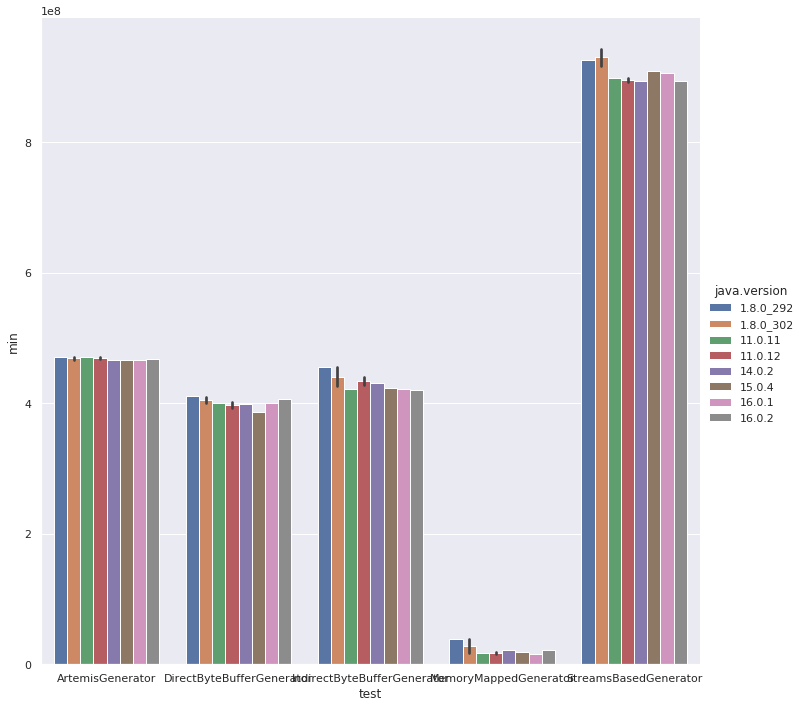

In [47]:
fg = sns.catplot(x='test', y='min', hue='java.version', 
                        data=outputs, kind='bar', height=10)
#fg.set_xlabels('')


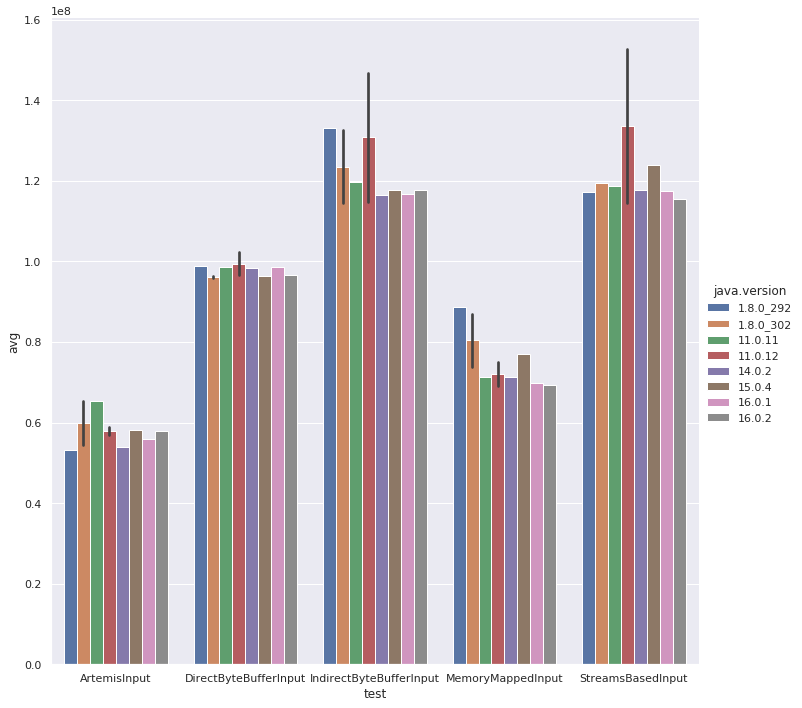

In [41]:
ig = sns.catplot(x='test', y='avg', hue='java.version', 
                        data=inputs, kind='bar', height=10)